In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('mnist_data.npz')
X_train, Y_train, X_test, Y_test = data['x_train'],data['y_train'],data['x_test'],data['y_test']
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.15)

print('X_train ',X_train.shape,'X_test ',X_test.shape,'X_val ',X_val.shape)

X_train  (51000, 28, 28) X_test  (10000, 28, 28) X_val  (9000, 28, 28)


Image size -  (28, 28)
Label -  9


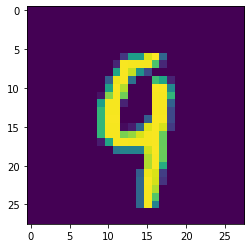

In [3]:
idx = 5
plt.imshow(X_train[idx])
print("Image size - ",X_train[idx].shape)
print("Label - ",Y_train[idx])

In [4]:
# Scaling Data
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [5]:
# Reshape Data

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('X_train ',X_train.shape,'X_test ',X_test.shape,'X_val ',X_val.shape)

X_train  (51000, 28, 28, 1) X_test  (10000, 28, 28, 1) X_val  (9000, 28, 28, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()

model.add(Conv2D(filters=10,kernel_size=(4,4),input_shape=(28, 28, 1),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(patience=2)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 10)        170       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                28820     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 29,200
Trainable params: 29,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,batch_size=100,verbose=2,callbacks=[early_stop])

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 - 7s - loss: 0.4855 - accuracy: 0.8608 - val_loss: 0.1936 - val_accuracy: 0.9462
Epoch 2/20
51000/51000 - 7s - loss: 0.1531 - accuracy: 0.9563 - val_loss: 0.1237 - val_accuracy: 0.9654
Epoch 3/20
51000/51000 - 7s - loss: 0.1041 - accuracy: 0.9701 - val_loss: 0.0955 - val_accuracy: 0.9712
Epoch 4/20
51000/51000 - 7s - loss: 0.0825 - accuracy: 0.9758 - val_loss: 0.0831 - val_accuracy: 0.9747
Epoch 5/20
51000/51000 - 7s - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0757 - val_accuracy: 0.9756
Epoch 6/20
51000/51000 - 7s - loss: 0.0614 - accuracy: 0.9822 - val_loss: 0.0721 - val_accuracy: 0.9774
Epoch 7/20
51000/51000 - 7s - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0616 - val_accuracy: 0.9802
Epoch 8/20
51000/51000 - 7s - loss: 0.0501 - accuracy: 0.9851 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 9/20
51000/51000 - 7s - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.0617 - val_accuracy: 0.9811


In [10]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0548 - accuracy: 0.9807


[0.054806072879838755, 0.9807]

In [11]:
p = model.predict(X_test).argmax(axis=1)
#predictions = model.predict_classes(X_test) # Direct method for classes.

Model Output -  4
Actual Label -  4


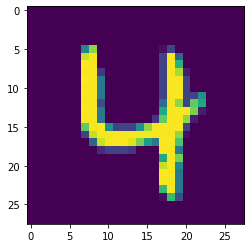

In [12]:
idx = 49
plt.imshow(X_test[idx,].reshape(28,28))
print('Model Output - ',p[idx])
print('Actual Label - ',Y_test[idx])